# Run and plot julia results

Run Julia script for Sec.5.3 then plot results here using Python (has a much nicer plotting workflow)

In [8]:
import pandas as pd

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as pp
import matplotlib.cm as cm

import IPython.display as ipyd

import os
import json

As shown in the book, the posterior for the root parameters $\left(\alpha,\,\beta\right)$ is:

$$
d\alpha\,d\beta\: p\left(\alpha,\beta\, | \, y\right)\propto d\alpha\,d\beta\: p\left(\alpha,\beta\right)\,\Pi_{j=1}^{J} \frac{\Gamma\left(\alpha+\beta\right)}{\Gamma\left(\alpha\right)\Gamma\left(\beta\right)}\cdot\frac{\Gamma\left(\alpha+y_j\right)\Gamma\left(\beta+n_j-y_j\right)}{\Gamma\left(\alpha+\beta+n_j\right)}
$$

One can re-parametrize the density to be in terms of

$$
\begin{align}
\nu&=\log\left(\frac{\alpha}{\beta}\right) \\
\eta&=\log\left(\alpha+\beta\right)
\end{align}
$$

Assuming that prior is uniform when given in terms of

$$
\begin{align}
\zeta&=\left(\alpha+\beta\right)^{-1/2} \\
\kappa&=\frac{\alpha}{\alpha+\beta}
\end{align}
$$

One can show that prior in $\nu,\,\eta$ will be:

$$
p\left(\nu,\,\eta\right)\:d\nu\,d\eta \propto \alpha\beta\cdot\left(\alpha+\beta\right)^{-5/2} \:d\nu\,d\eta
$$

Hence the posterior will be:

$$
d\nu\,d\eta\: p\left(\alpha,\beta\, | \, y\right)\propto d\nu\,d\eta\: \alpha\beta\cdot\left(\alpha+\beta\right)^{-5/2} \,\Pi_{j=1}^{J} \frac{\Gamma\left(\alpha+\beta\right)}{\Gamma\left(\alpha\right)\Gamma\left(\beta\right)}\cdot\frac{\Gamma\left(\alpha+y_j\right)\Gamma\left(\beta+n_j-y_j\right)}{\Gamma\left(\alpha+\beta+n_j\right)}
$$

So we grid the data on $\eta,\nu$ grid

The log-probabilities are:

$$
\begin{align}
\log p\left(\alpha,\beta\, | \, y\right) =& \mbox{const} + \left(-\frac{5}{2}\right) \cdot \log\left(\alpha+\beta\right) + \log\left(\alpha\right)+\log\left(\beta\right)+\\
&+ \sum_{j=1}^{J}\Big[  \log\Gamma\left(\alpha+\beta\right) - \log\Gamma\left(\alpha\right)-\log\Gamma\left(\beta\right) + \log\Gamma\left(\alpha+y_j\right)+ \\
&+ \log\Gamma\left(\beta+n_j-y_j\right)-\log\Gamma\left(\alpha+\beta+n_j\right) \Big]
\end{align}
$$

With:

$$
\begin{align}
\alpha&=\frac{\exp\left(\eta+\nu\right)}{1+\exp\left(\nu\right)} \\
\beta&=\frac{\exp\left(\eta\right)}{1+\exp\left(\nu\right)} 
\end{align}
$$

Run Julia scipt from cmd and pick up the output CSV

In [50]:
cur_dir = os.path.abspath('.')
proc_json = os.path.join(cur_dir, 'proc.json')

print('Launching julia')
#
! ~/anaconda3/envs/jenv/bin/julia sec_5_3_cmd.jl \
--src_data_csv={cur_dir}/table_5_1_rat_tumors.csv --save_json={proc_json} \
--eta_min 1.0 --eta_max 5.0 --eta_step_count 250 \
--nu_min -2.6 --nu_max -1 --nu_step_count 250

print('Back in python loading json')
with open(proc_json, 'r') as fh:
    proc_dict = json.load(fh)
    
    
print(proc_dict.keys())

Launching julia
Done
Back in python loading json
dict_keys(['nu_scat_arr', 'status', 'post_scat_arr', 'eta_scat_arr'])


## Plot results

Text(0, 0.5, '$\\eta=\\log\\left(\\alpha+\\beta\\right)$')

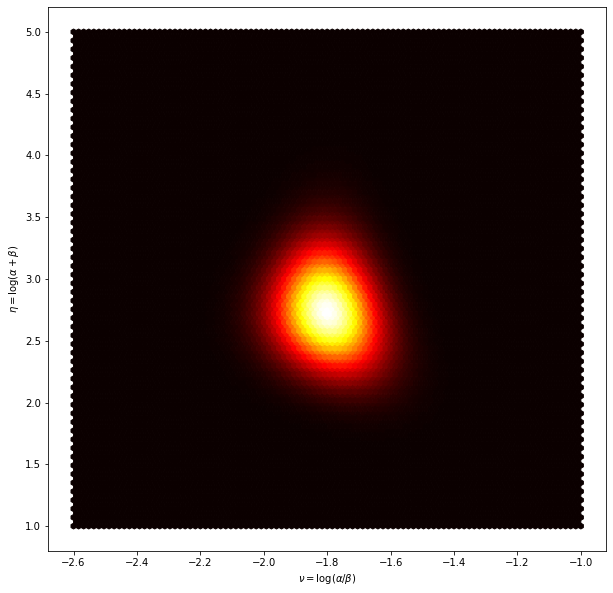

In [51]:
fig, ax = pp.subplots(figsize=(10, 10))

hexbin_out = ax.hexbin(
    proc_dict['nu_scat_arr'],
    proc_dict['eta_scat_arr'],
    proc_dict['post_scat_arr'],
    cmap=cm.hot,
    gridsize=100
)

ax.set_xlabel('$\\nu=\\log\\left(\\alpha/\\beta\\right)$')
ax.set_ylabel('$\\eta=\\log\\left(\\alpha+\\beta\\right)$')

## Compute average values from the posterior

In [56]:
nu_scat_arr = np.array(proc_dict['nu_scat_arr'])
eta_scat_arr = np.array(proc_dict['eta_scat_arr'])
post_scat_arr = proc_dict['post_scat_arr']

alpha_arr = np.exp(nu_scat_arr + eta_scat_arr) / (1+np.exp(nu_scat_arr))
beta_arr = np.exp(eta_scat_arr) / (1+np.exp(nu_scat_arr))

#using the fact that posterior is normalized to sum to 1
mean_alpha = np.sum(alpha_arr * post_scat_arr)
mean_beta = np.sum(beta_arr * post_scat_arr)

print(f'E[alpha|y]={mean_alpha:.2f}\nE[beta|y]={mean_beta:.2f}')

E[alpha|y]=2.36
E[beta|y]=14.27


Which matches values reported by Gelman